In [9]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

In [10]:
from sklearn.model_selection import train_test_split

# # Data inladen
df = pd.read_csv("final_df.csv")
print(df.head())
# df = groot_gemid_df

# Eerst de data opschudden om bias te voorkomen
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Zorg ervoor dat elke ervaring, geslacht en gewichtsklasse in elke set vertegenwoordigd zijn
train_data = pd.DataFrame()
val_data = pd.DataFrame()
test_data = pd.DataFrame()

for ervaring in df['ervaring'].unique():
    for geslacht in df['binary_geslacht'].unique():
        for gewichtsklasse in df['binary_gewichtsklasse'].unique():
            subset = df[(df['ervaring'] == ervaring) & (df['binary_geslacht'] == geslacht) & (df['binary_gewichtsklasse'] == gewichtsklasse)]
            if not subset.empty:
                temp_train, temp_temp = train_test_split(subset, test_size=0.3, random_state=42)
                temp_val, temp_test = train_test_split(temp_temp, test_size=0.3, random_state=42)
                train_data = pd.concat([train_data, temp_train])
                val_data = pd.concat([val_data, temp_val])
                test_data = pd.concat([test_data, temp_test])

# Reset indexen
train_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Controleren op juiste verdeling
print(f"Trainingsdata: {len(train_data)} rijen")
print(f"Validatiedata: {len(val_data)} rijen")
print(f"Testdata: {len(test_data)} rijen")

# Optioneel: data opslaan in aparte bestanden
train_data.to_csv('train_data.csv', index=False)
val_data.to_csv('val_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

print(df['2k tijd'].min())
print(df['2k tijd'].max())

   ervaring  500_split  2k tijd  binary_trainingtype  binary_geslacht  \
0       1.0      104.6    379.9                    0                0   
1       1.0      104.7    379.9                    0                0   
2       1.0      104.3    379.9                    0                0   
3       1.0      104.0    379.9                    0                0   
4       1.0      104.1    379.9                    0                0   

   binary_gewichtsklasse  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1  
Trainingsdata: 3018 rijen
Validatiedata: 905 rijen
Testdata: 391 rijen
371.8
510.1


In [11]:
X_train = train_data.drop(columns=['2k tijd'])
y_train = train_data['2k tijd']

X_val = val_data.drop(columns=['2k tijd'])
y_val = val_data['2k tijd']

X_test = test_data.drop(columns=['2k tijd'])
y_test = test_data['2k tijd']

# Standardize the features
scaler = StandardScaler()
scaler.fit(X_train)  # Fit on training data only
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

[414.71087038]
[419.44280894 427.12883923 423.3962863  426.55324747 424.55061326
 426.34906324 420.35678189 426.78417265 429.33591594 424.25078386
 428.2779801  419.77773257 426.98442123 424.18701238 437.71324066
 427.30062489 437.70388649 425.92960251 412.97961434 426.11252485
 416.23459255 424.42728576 418.68037751 426.72033531 407.12271701
 426.31053161 430.42600515 415.21132009 417.28922657 422.00333904
 424.40978512 431.37811381 405.5        407.4572974  423.82798602
 426.6596272  417.51421238 425.26100405 415.91320153 420.09495876
 405.5        427.1615875  423.41414839 419.52950951 422.3616991
 423.01219151 426.14710821 422.16700468 421.05821946 418.31551775
 424.6182124  422.50137546 420.86031023 416.17147931 411.98387741
 420.74098994 425.70860989 428.26715722 411.45972333 415.45560103
 401.62356521 399.49028794 410.0895956  416.30253675 406.4605331
 413.9442     397.38276046 409.96588972 394.44589953 414.06742281
 402.19771055 406.85303738 405.93406538 407.36454523 407.120540

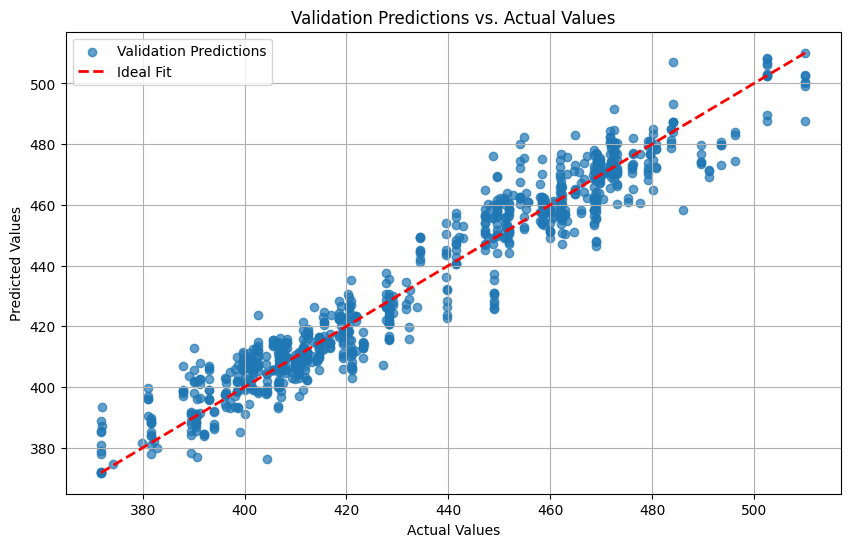

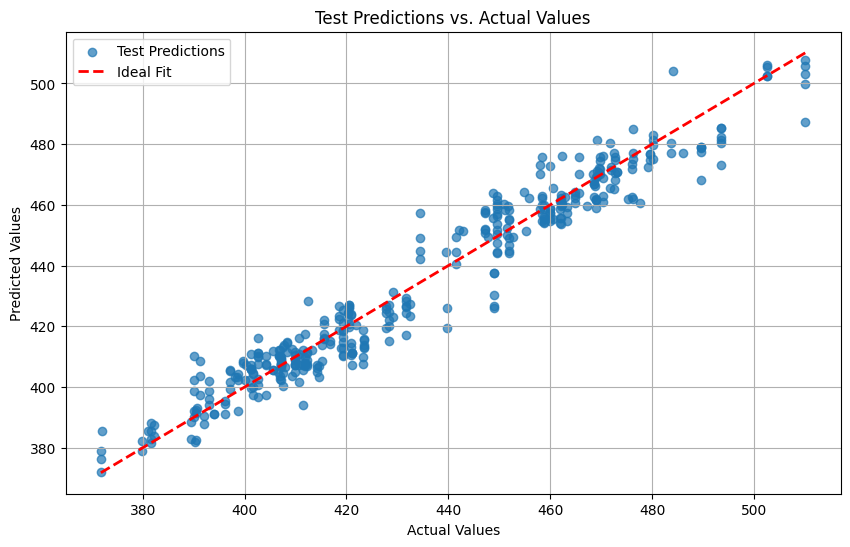

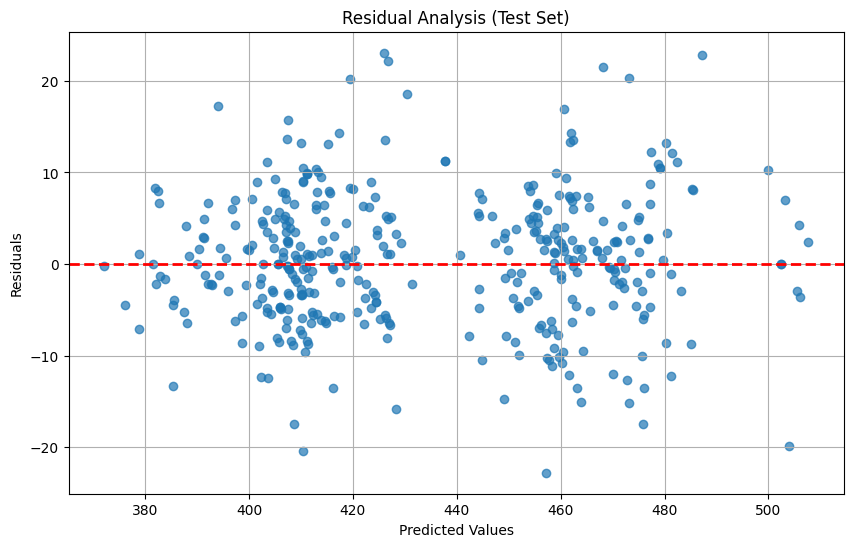

In [12]:
regr = RandomForestRegressor(max_depth=10, random_state=0)

regr.fit(X_train_scaled, y_train)

val_pred = regr.predict(X_val_scaled)

predictions = regr.predict(X_test_scaled)
prediction1 = regr.predict(np.array([[1, 104.6, 0, 0, 1]]))
print(prediction1)
print(predictions)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
mse_val = mean_squared_error(y_val, val_pred)
print(f"mse = {mse}")
print(f"mse_val = {mse_val}")

rse = np.sqrt(mse)
print(f"rse = {rse}")

val_r2 = r2_score(y_val, y_val)
print(f"val_r2 = {val_r2}")
test_r2 = r2_score(y_test, y_test)
print(f"test_r2 = {test_r2}")

from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, and y_test are defined

# Train the RandomForestRegressor
regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X_train_scaled, y_train)

# Predictions
val_pred = regr.predict(X_val_scaled)
predictions = regr.predict(X_test_scaled)
prediction1 = regr.predict(np.array([[1, 104.6, 0, 0, 1]]))

print(prediction1)
print(predictions)

# Metrics
mse = mean_squared_error(y_test, predictions)
mse_val = mean_squared_error(y_val, val_pred)
rse = np.sqrt(mse)

print(f"mse = {mse}")
print(f"mse_val = {mse_val}")
print(f"rse = {rse}")

val_r2 = r2_score(y_val, val_pred)
test_r2 = r2_score(y_test, predictions)

print(f"val_r2 = {val_r2}")
print(f"test_r2 = {test_r2}")

# Plot 1: Predictions vs Actual for Validation Set
plt.figure(figsize=(10, 6))
plt.scatter(y_val, val_pred, alpha=0.7, label='Validation Predictions')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Validation Predictions vs. Actual Values')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Predictions vs Actual for Test Set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.7, label='Test Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Predictions vs. Actual Values')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Residuals for Test Set
residuals_test = y_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals_test, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis (Test Set)')
plt.grid(True)
plt.show()


In [13]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

max_depths = range(1, 15)
validation_errors = []

for depth in max_depths:
    model = RandomForestRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    mse = mean_squared_error(y_val, predictions)
    validation_errors.append(mse)

best_depth = max_depths[validation_errors.index(min(validation_errors))]
print(f"Best max_depth: {best_depth}")


Best max_depth: 10
